# (1.0) Установка пакетов

In [1]:
import numpy as np
import pandas as pd

# (1.1) Список датафреймов

X1 - исходный датафрейм  
X1_N - датафрейм с нормированными переменными  
X1_PCA - исходный датафрейм с новой переменной, созданной на основании скоррелированных переменных  
X1_N_PCA - датафрейм с нормированными переменными и с новой переменной, созданной на основании скоррелированных переменных
X1_COR - исходный датафрейм с удаленными скоррелированными переменными
X1_N_COR - датафрейм с нормированными переменными с удаленными скоррелированными переменными

# (1.1) Загрузка данных

In [143]:
X1 = pd.read_csv('ML.csv', sep=";")
X1.head(1)

,SIGNAL_ID,TRADEDATE,CROSSTURNOVER1,CROSSDEALRATIOS,EPSILONE,PROFITPL,PROFITABILITYY,SIGNALSK,RATINGCROSSDEALRATIOS,RATINGEPSILONE,...,RATINGAVGLIFETIME,RATINGAGTDEVPRICE,RATINGAGTDEVVOL,RATINGCROSSTURNOVER1,RATINGCROSSTURNOVER2,RATINGCROSSVALUE,USERGRADE_ID,SHORTNAME,IDENT,DETECTION_ID
0,2.183220e+11,03.18.2019 15:01:21,1.0,24.0,0.0,2290.0,1.0,3.0,24.0,0.0,...,100.0,NaN,NaN,NaN,NaN,NaN,4.0,TRNF-3.19,FORTS,238 944


In [89]:
# смотрим типы данных
X1.dtypes

SIGNAL_ID                float64
TRADEDATE                 object
CROSSTURNOVER1           float64
CROSSDEALRATIOS          float64
EPSILONE                 float64
PROFITPL                 float64
PROFITABILITYY           float64
SIGNALSK                 float64
RATINGCROSSDEALRATIOS    float64
RATINGEPSILONE           float64
RATINGPROFITPL           float64
RATINGPROFITABILITYY     float64
RATINGSIGNALSK           float64
RATINGINTEGRAL           float64
AGTDEV_BS                float64
AGTDEV_PRICE             float64
AGTDEV_VOL               float64
RATINGDEV                float64
TRADEDATE_LAST            object
EVENT_ID                 float64
CROSSTURNOVER2           float64
CROSSVALUE               float64
AVGLIFETIME              float64
RATINGAVGLIFETIME        float64
RATINGAGTDEVPRICE        float64
RATINGAGTDEVVOL          float64
RATINGCROSSTURNOVER1     float64
RATINGCROSSTURNOVER2     float64
RATINGCROSSVALUE         float64
USERGRADE_ID             float64
SHORTNAME 

# (1.2) Удаление лишних переменных

In [144]:
# удаляем рейтинги
X1 = X1.drop(['RATINGCROSSDEALRATIOS','RATINGEPSILONE','RATINGPROFITPL','RATINGPROFITABILITYY',
              'RATINGSIGNALSK','RATINGINTEGRAL','RATINGDEV','RATINGAVGLIFETIME','RATINGAGTDEVPRICE',
              'RATINGAGTDEVVOL','RATINGCROSSTURNOVER1','RATINGCROSSTURNOVER2','RATINGCROSSVALUE'], axis=1)
X1.head(1)

,SIGNAL_ID,TRADEDATE,CROSSTURNOVER1,CROSSDEALRATIOS,EPSILONE,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_BS,AGTDEV_PRICE,AGTDEV_VOL,TRADEDATE_LAST,EVENT_ID,CROSSTURNOVER2,CROSSVALUE,AVGLIFETIME,USERGRADE_ID,SHORTNAME,IDENT,DETECTION_ID
0,2.183220e+11,03.18.2019 15:01:21,1.0,24.0,0.0,2290.0,1.0,3.0,0.0,0.0,0.0,03.18.2019 15:52:48,NaN,0.0,1732440.0,NaN,4.0,TRNF-3.19,FORTS,238 944


In [145]:
# удаляем указание инструмента
X1 = X1.drop(['IDENT','SHORTNAME'], axis=1)
X1.head(1)

,SIGNAL_ID,TRADEDATE,CROSSTURNOVER1,CROSSDEALRATIOS,EPSILONE,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_BS,AGTDEV_PRICE,AGTDEV_VOL,TRADEDATE_LAST,EVENT_ID,CROSSTURNOVER2,CROSSVALUE,AVGLIFETIME,USERGRADE_ID,DETECTION_ID
0,2.183220e+11,03.18.2019 15:01:21,1.0,24.0,0.0,2290.0,1.0,3.0,0.0,0.0,0.0,03.18.2019 15:52:48,NaN,0.0,1732440.0,NaN,4.0,238 944


In [146]:
# удаляем лишние переменные
X1 = X1.drop(['DETECTION_ID','EVENT_ID','SIGNAL_ID'], axis=1)
X1.head(1)

,TRADEDATE,CROSSTURNOVER1,CROSSDEALRATIOS,EPSILONE,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_BS,AGTDEV_PRICE,AGTDEV_VOL,TRADEDATE_LAST,CROSSTURNOVER2,CROSSVALUE,AVGLIFETIME,USERGRADE_ID
0,03.18.2019 15:01:21,1.0,24.0,0.0,2290.0,1.0,3.0,0.0,0.0,0.0,03.18.2019 15:52:48,0.0,1732440.0,NaN,4.0


In [147]:
# удаляем переменные с нулевой вариацией
for col in list(X1.columns):
        print(col, X1[col].unique())
        print()

TRADEDATE ['03.18.2019 15:01:21' '03.19.2019 10:00:07' '03.07.2019 16:31' ...
 '01.22.2019 21:10:08' '10.31.2018 16:03:07' '10.26.2018 14:26:38']

CROSSTURNOVER1 [1.]

CROSSDEALRATIOS [ 24.   3.   2.   4.   6.   1.  18.  40.  15.   5.   8.  59.   9.   7.
  23.  19. 100.  17.  16.  10.  11.  22.  12.  13.   0.  57.  14.  50.
  67.  28.  95.  31.  33.  21.  20.  41.  92.  74.  73.  25.  45.  29.
  36.  26.  51.  60.  52.  43.  30.  69.  77.  34.  75.  53.  37.  38.
  44.  32.  65.  27.  35.  89.  80.  46.  86.  42.  87.  47.  71.  70.
  66.  99.  79.  48.  63.  62.  84.  98.  72.  76.  49.  55.  97. 200.
  88.  56.  82.  93.  54. 115.  39.  90.  78.  91.  81.  58.  94.  96.
  68.  61.]

EPSILONE [0.]

PROFITPL [ 2290.  8909.   788. ... 43622. 23929.  4300.]

PROFITABILITYY [  1.   0.   4.   2.  11.   3.  49.  18.   5.  24.  12.  13.  15.   6.
  20.  16.   8.   9.  14.   7.  26.  32.  30.  22.  10.  76.  37.  17.
  43.  21.  29.  28.  41.  25.  19.  27.  36.  45.  35.  23.  50.  63.
  48.

In [148]:
# удаляем столбцы с нулевой вариацией
X1 = X1.drop(['CROSSTURNOVER1','EPSILONE','AGTDEV_BS','AVGLIFETIME'], axis=1)
X1.head(1)

,TRADEDATE,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_PRICE,AGTDEV_VOL,TRADEDATE_LAST,CROSSTURNOVER2,CROSSVALUE,USERGRADE_ID
0,03.18.2019 15:01:21,24.0,2290.0,1.0,3.0,0.0,0.0,03.18.2019 15:52:48,0.0,1732440.0,4.0


# (1.3) Преобразование переменных

In [149]:
# преобразуем объект в datetime и считаем длительность сигнала
X1['TRADEDATE_LAST'] = pd.to_datetime(pd.Series(X1['TRADEDATE_LAST']))
X1['TRADEDATE'] = pd.to_datetime(pd.Series(X1['TRADEDATE']))
X1['DELTA'] = X1['TRADEDATE_LAST']- X1['TRADEDATE']
X1 = X1.drop(['TRADEDATE_LAST','TRADEDATE'], axis=1)
X1.head(1)

,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_PRICE,AGTDEV_VOL,CROSSTURNOVER2,CROSSVALUE,USERGRADE_ID,DELTA
0,24.0,2290.0,1.0,3.0,0.0,0.0,0.0,1732440.0,4.0,00:51:27


In [150]:
# создаем бинарную переменную на основании USERGRADE_ID (0 - шум, 1 - не шум)
# все, что имеет USERGRADE_ID 2 и 3, превращаем в NOISE = 0 Все, что имеет USERGRADE_ID 4, превращаем в NOISE = 1
X1['NOT_NOISE'] = np.where((X1.USERGRADE_ID == 2) | (X1.USERGRADE_ID == 3), 0, 1)
X1 = X1.drop(['USERGRADE_ID'], axis=1)
X1.head(1)

,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_PRICE,AGTDEV_VOL,CROSSTURNOVER2,CROSSVALUE,DELTA,NOT_NOISE
0,24.0,2290.0,1.0,3.0,0.0,0.0,0.0,1732440.0,00:51:27,1


Нормируем переменные в соответствии со следующим преобразованием:   
$$\\F_i = \frac{f_i - \overline{f}} {St.dev(f)}$$

In [151]:
# создаем новый датафрейм с нормированными переменными
X1_N = pd.DataFrame()
X1_N['CROSSDEALRATIOS'] = [(X1.loc[i,'CROSSDEALRATIOS'] - X1['CROSSDEALRATIOS'].mean())/X1['CROSSDEALRATIOS'].std() for i in range(len(X1.CROSSDEALRATIOS))]
X1_N['PROFITPL'] = [(X1.loc[i,'PROFITPL'] - X1['PROFITPL'].mean())/X1['PROFITPL'].std() for i in range(len(X1.PROFITPL))]
X1_N['PROFITABILITYY'] = [(X1.loc[i,'PROFITABILITYY'] - X1['PROFITABILITYY'].mean())/X1['PROFITABILITYY'].std() for i in range(len(X1.PROFITABILITYY))]
X1_N['SIGNALSK'] = [(X1.loc[i,'SIGNALSK'] - X1['SIGNALSK'].mean())/X1['SIGNALSK'].std() for i in range(len(X1.SIGNALSK))]
X1_N['AGTDEV_PRICE'] = [(X1.loc[i,'AGTDEV_PRICE'] - X1['AGTDEV_PRICE'].mean())/X1['AGTDEV_PRICE'].std() for i in range(len(X1.AGTDEV_PRICE))]
X1_N['AGTDEV_VOL'] = [(X1.loc[i,'AGTDEV_VOL'] - X1['AGTDEV_VOL'].mean())/X1['AGTDEV_VOL'].std() for i in range(len(X1.AGTDEV_VOL))]
X1_N['CROSSTURNOVER2'] = [(X1.loc[i,'CROSSTURNOVER2'] - X1['CROSSTURNOVER2'].mean())/X1['CROSSTURNOVER2'].std() for i in range(len(X1.CROSSTURNOVER2))]
X1_N['CROSSVALUE'] = [(X1.loc[i,'CROSSVALUE'] - X1['CROSSVALUE'].mean())/X1['CROSSVALUE'].std() for i in range(len(X1.CROSSVALUE))]
X1_N['DELTA'] = [(X1.loc[i,'DELTA'].seconds - X1['DELTA'].mean().seconds)/X1['DELTA'].std().seconds for i in range(len(X1.DELTA))]
X1_N['NOT_NOISE'] = [(X1.loc[i,'NOT_NOISE'] - X1['NOT_NOISE'].mean())/X1['NOT_NOISE'].std() for i in range(len(X1.NOT_NOISE))]
X1_N.head(5)

,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_PRICE,AGTDEV_VOL,CROSSTURNOVER2,CROSSVALUE,DELTA,NOT_NOISE
0,0.448633,-0.019631,-0.368477,-0.502279,-1.15257,-1.14048,-0.290189,-0.056744,-0.710079,0.170078
1,-0.473516,-0.016409,-0.368477,-0.512488,-1.15257,-1.14048,-0.290189,0.185901,3.524624,0.170078
2,-0.517427,-0.020362,-0.368477,-0.502279,-1.15257,-1.14048,-0.290189,-0.092792,1.066163,0.170078
3,-0.473516,-0.020132,-0.368477,-0.502279,-1.15257,-1.14048,-0.290189,-0.072149,2.874938,0.170078
4,-0.429604,-0.019093,-0.385397,-0.512488,-1.15257,-1.14048,-0.290189,0.338598,-0.984778,-5.878731


In [152]:
X1_N.describe()

,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_PRICE,AGTDEV_VOL,CROSSTURNOVER2,CROSSVALUE,DELTA,NOT_NOISE
count,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6295.000000,6.295000e+03
mean,4.034289e-15,3.007920e-17,5.138013e-15,-3.563472e-15,-4.187842e-15,1.614669e-15,-3.632308e-15,1.014390e-16,0.000090,-3.450854e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000041,1.000000e+00
min,-6.052511e-01,-2.074524e-02,-3.853970e-01,-5.124880e-01,-1.152570e+00,-1.140480e+00,-2.901893e-01,-1.056802e-01,-1.017212,-5.878731e+00
25%,-4.735155e-01,-2.071847e-02,-3.515561e-01,-5.073834e-01,-1.152570e+00,-1.140480e+00,-2.901893e-01,-1.055028e-01,-0.842752,1.700777e-01
50%,-3.856918e-01,-2.063085e-02,-3.007946e-01,-4.767557e-01,3.483462e-01,2.029559e-01,-2.901893e-01,-1.048257e-01,-0.349418,1.700777e-01
75%,-7.830889e-02,-2.013095e-02,-1.146695e-01,-9.391018e-02,3.483462e-01,2.029559e-01,-2.901893e-01,-9.930869e-02,0.660283,1.700777e-01
max,8.177119e+00,7.724810e+01,1.196655e+01,2.785088e+00,1.849263e+00,1.546391e+00,3.445479e+00,3.485233e+01,3.934235,1.700777e-01


# (1.4) Корреляционная матрица

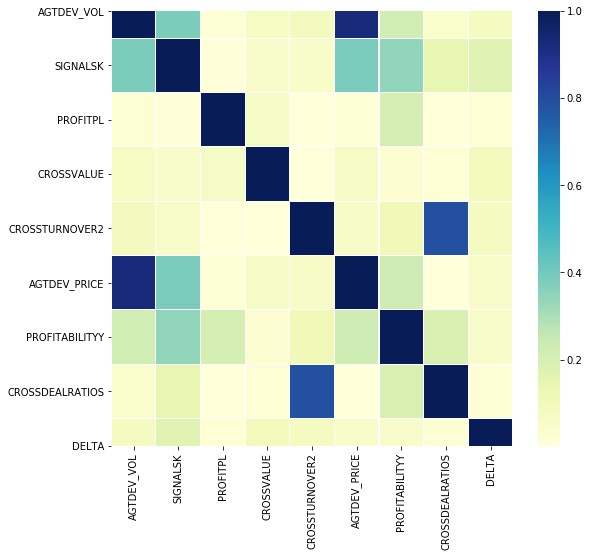

In [153]:
# Create correlation matrix
corr_matrix = X1_N[{'CROSSDEALRATIOS','PROFITPL','PROFITABILITYY','SIGNALSK',
    'AGTDEV_PRICE','AGTDEV_VOL','CROSSTURNOVER2','CROSSVALUE','DELTA'}].corr().abs()

# Select upper triangle of correlation matrix
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.95
#to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
#print(to_drop)
#print(corr_matrix)
from matplotlib import pyplot as plt
import seaborn as sns
#columns=['SIGNAL_ID', 'TRADEDATE', 'CROSSTURNOVER1', 'CROSSDEALRATIOS', 'EPSILONE', 'PROFITPL','PROFITABILITYY','SIGNALSK', 'RATINGCROSSDEALRATIOS', 'RATINGEPSILONE', 'RATINGPROFITPL', 'RATINGPROFITABILITYY', 'RATINGSIGNALSK', 'RATINGINTEGRAL','AGTDEV_BS', 'AGTDEV_PRICE', 'AGTDEV_VO', 'RATINGDEV', 'TRADEDATE_LAST', 'EVENT_ID','CROSSTURNOVER2','CROSSVALUE','AVGLIFETIME','RATINGAVGLIFETIME','USERGRADE_ID','SHORTNAME','IDENT','DETECTION_ID']
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corr_matrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [154]:
# создаем новые датафреймы:
# X1_COR - исходный датафрейм с удаленными скоррелированными переменными
# X1_N_COR - датафрейм с нормированными переменными с удаленными скоррелированными переменными
X1_COR = X1
X1_COR = X1_COR.drop(['AGTDEV_VOL','CROSSTURNOVER2','AGTDEV_PRICE'], axis=1)
X1_N_COR = X1
X1_N_COR = X1_N_COR.drop(['AGTDEV_VOL','CROSSTURNOVER2','AGTDEV_PRICE'], axis=1)

# (1.5) Метод главных компонент

In [155]:
# создаем новую переменную с помощью метода главных компонент на основании скоррелированных переменных
# создаем список на основании скоррелированных переменных
x = X1.AGTDEV_VOL.values
y = X1.CROSSTURNOVER2.values
z = X1.AGTDEV_PRICE.values
yz = np.vstack((x,y,z))
# создаем компонену на основании скоррелированных переменных
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(np.transpose(yz))

In [156]:
# создаем новые датафреймы:
# X1_PCA - исходный датафрейм с новой переменной, созданной на основании скоррелированных переменных  
# X1_N_PCA - датафрейм с нормированными переменными и с новой переменной, созданной на основании скоррелированных переменных
X1_PCA = X1
X1_PCA['PCA'] = XPCAreduced
X1_PCA = X1_PCA.drop(['AGTDEV_VOL','CROSSTURNOVER2','AGTDEV_PRICE'], axis=1)
X1_N_PCA = X1_N
X1_N_PCA['PCA'] = XPCAreduced
X1_N_PCA = X1_N_PCA.drop(['AGTDEV_VOL','CROSSTURNOVER2','AGTDEV_PRICE'], axis=1)

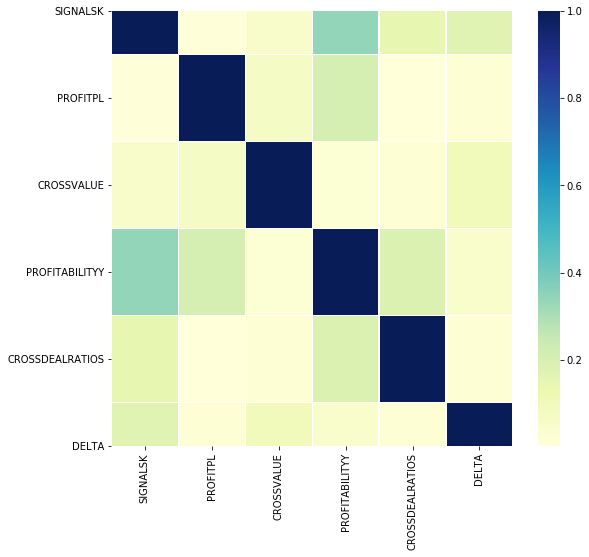

In [136]:
# Create correlation matrix
corr_matrix = X1_N_PCA[{'CROSSDEALRATIOS','PROFITPL','PROFITABILITYY','SIGNALSK',
    'CROSSVALUE','DELTA'}].corr().abs()

# Select upper triangle of correlation matrix
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.95
#to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
#print(to_drop)
#print(corr_matrix)
from matplotlib import pyplot as plt
import seaborn as sns
#columns=['SIGNAL_ID', 'TRADEDATE', 'CROSSTURNOVER1', 'CROSSDEALRATIOS', 'EPSILONE', 'PROFITPL','PROFITABILITYY','SIGNALSK', 'RATINGCROSSDEALRATIOS', 'RATINGEPSILONE', 'RATINGPROFITPL', 'RATINGPROFITABILITYY', 'RATINGSIGNALSK', 'RATINGINTEGRAL','AGTDEV_BS', 'AGTDEV_PRICE', 'AGTDEV_VO', 'RATINGDEV', 'TRADEDATE_LAST', 'EVENT_ID','CROSSTURNOVER2','CROSSVALUE','AVGLIFETIME','RATINGAVGLIFETIME','USERGRADE_ID','SHORTNAME','IDENT','DETECTION_ID']
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corr_matrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

# (1.6) Делим выборку на train и test

In [157]:
# выделяем NOT_NOISE в отдельный датафрейм и удаляем из исходного
y1 = pd.DataFrame(X1['NOT_NOISE'], columns=['NOT_NOISE'])
y1_n = pd.DataFrame(X1_N['NOT_NOISE'], columns=['NOT_NOISE'])
X1 = X1.drop(['NOT_NOISE'], axis=1)
X1_N = X1_N.drop(['NOT_NOISE'], axis=1)
X1_PCA = X1_PCA.drop(['NOT_NOISE'], axis=1)
X1_N_PCA = X1_N_PCA.drop(['NOT_NOISE'], axis=1)
X1_COR = X1_COR.drop(['NOT_NOISE'], axis=1)
X1_N_COR = X1_N_COR.drop(['NOT_NOISE'], axis=1)

X1 - исходный датафрейм  
X1_N - датафрейм с нормированными переменными  
X1_PCA - исходный датафрейм с новой переменной, созданной на основании скоррелированных переменных  
X1_N_PCA - датафрейм с нормированными переменными и с новой переменной, созданной на основании скоррелированных переменных
X1_COR - исходный датафрейм с удаленными скоррелированными переменными
X1_N_COR - датафрейм с нормированными переменными с удаленными скоррелированными переменными

In [159]:
# создаем из всех датафреймов тренировочную и тестовую выборку
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30, random_state = 123)
x_n_train, x_n_test, y_n_train, y_n_test = train_test_split(X1_N, y1, test_size=0.30, random_state = 123)
x_pca_train, x_pca_test, y_train, y_test = train_test_split(X1_PCA, y1, test_size=0.30, random_state = 123)
x_n_pca_train, x_n_pca_test, y_n_train, y_n_test = train_test_split(X1_N_PCA, y1, test_size=0.30, random_state = 123)
x_cor_train, x_cor_test, y_train, y_test = train_test_split(X1_COR, y1, test_size=0.30, random_state = 123)
x_n_cor_train, x_n_cor_test, y_n_train, y_n_test = train_test_split(X1_N_COR, y1, test_size=0.30, random_state = 123)